Spark_Version:2.0.1<br/>
Python_Version:3.5.2<br/>
System:Linux<br/>

In [1]:
import platform
print("Python_Version:" + platform.python_version())
print("System:" + platform.system())
print("Spark_Version:" + sc.version)

Python_Version:3.5.2
System:Linux
Spark_Version:2.0.1


In [2]:
sc.master

'local[*]'

In [3]:
import re
from operator import add

In [4]:
file_in = sc.textFile("resource/NOTICE")

In [5]:
file_in.count()

664

In [6]:
print("number of lines in file:%s" % file_in.count())
print("number of characters in file:%s" % file_in.map(lambda s: len(s)).reduce(add))

number of lines in file:664
number of characters in file:24078


In [7]:
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))

In [8]:
words = words.filter(lambda x: len(x)>3)

In [9]:
words = words.map(lambda w: (w,1))

In [10]:
words = words.reduceByKey(add)

In [11]:
words = words.map(lambda x: (x[1], x[0])).sortByKey(False)

In [12]:
words.take(20)

[(108, 'license'),
 (106, 'apache'),
 (72, 'copyright'),
 (61, 'software'),
 (56, 'http'),
 (54, 'this'),
 (38, 'product'),
 (38, 'foundation'),
 (28, 'under'),
 (27, 'includes'),
 (26, 'commons'),
 (19, 'developed'),
 (18, 'version'),
 (18, 'project'),
 (18, 'file'),
 (17, 'from'),
 (16, 'public'),
 (15, 'java'),
 (15, 'distributed'),
 (14, 'following')]

In [13]:
import shutil
try:
    shutil.rmtree('/root/.cache/matplotlib')
except FileNotFoundError:
    pass

In [14]:
%matplotlib inline

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [15]:
import matplotlib.pyplot as plt

In [16]:
def histogram(words):
    count = list(map(lambda x: x[1], words))
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count, color = 'grey')
    plt.yticks(range(len(count)), word)

In [17]:
words = words.map(lambda x: (x[1], x[0]))
words.take(25)

[('license', 108),
 ('apache', 106),
 ('copyright', 72),
 ('software', 61),
 ('http', 56),
 ('this', 54),
 ('product', 38),
 ('foundation', 38),
 ('under', 28),
 ('includes', 27),
 ('commons', 26),
 ('developed', 19),
 ('version', 18),
 ('project', 18),
 ('file', 18),
 ('from', 17),
 ('public', 16),
 ('java', 15),
 ('distributed', 15),
 ('following', 14),
 ('common', 13),
 ('which', 12),
 ('junit', 12),
 ('code', 12),
 ('2011', 12)]

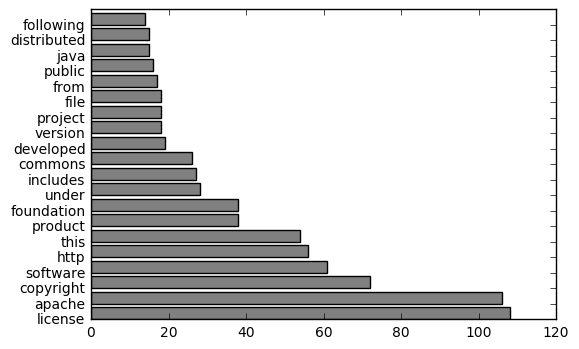

In [18]:
histogram(words.take(20))